In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [37]:
# increases plt font size
plt.rcParams.update({'font.size': 13})

In [38]:
dfs = {}

dirname = 'imgs'

for fn in os.listdir(dirname):
    if not fn.endswith('.csv'):
        continue
    name = fn.split(":")[1].split("_")[0]
    if name not in dfs:
        dfs[name] = []
    df = pd.read_csv(f'{dirname}/{fn}')
    dfs[name].append(df)

In [39]:
def avg_cols(dfs, col_name, win_size=-1):
    if win_size == -1:
        cols = np.array([df[col_name] for df in dfs])
    else:
        cols = np.array([df[col_name].rolling(window=win_size).mean() for df in dfs])
    # Check all cols are the same length
    if len(set([len(col) for col in cols])) != 1:
        raise ValueError(f"Not all columns are the same length, lengths:{set([len(col) for col in cols])}")
    return {
        f"{col_name}_mean": np.mean(cols, axis=0),
        f"{col_name}_std": np.std(cols, axis=0),
        f"{col_name}_median": np.median(cols, axis=0),
    }

def make_avg_dataframe(dfs, win_size=-1):
    cols = {}
    for k, v in avg_cols(dfs, 'PercentUniqueClassesProduced', win_size=win_size).items():
        cols[k] = v
    for k, v in avg_cols(dfs, 'PercentOfProductionsValid', win_size=win_size).items():
        cols[k] = v
    for k, v in avg_cols(dfs, 'BestEval', win_size=win_size).items():
        cols[k] = v
    for k, v in avg_cols(dfs, 'Generation', win_size=win_size).items():
        cols[k] = v
    return pd.DataFrame(cols)


In [40]:
win_size=1000
avg_dfs = {}
for mask_percent, dfs_list in dfs.items():
    avg_dfs[mask_percent] = make_avg_dataframe(dfs_list, win_size=win_size)

In [52]:
all_pairs = []
#all_pairs.append(("MaskedDense", (1, 0, 0), avg_dfs["masked"]))
#all_pairs.append(("Dense", (0, 0, 0), avg_dfs["dense"]))
all_pairs.append(("MaskedDense + L2", (1, 0, 0), avg_dfs["masked+l2"]))
all_pairs.append(("Dense + L2", (0, 0, 0), avg_dfs["dense+l2"]))

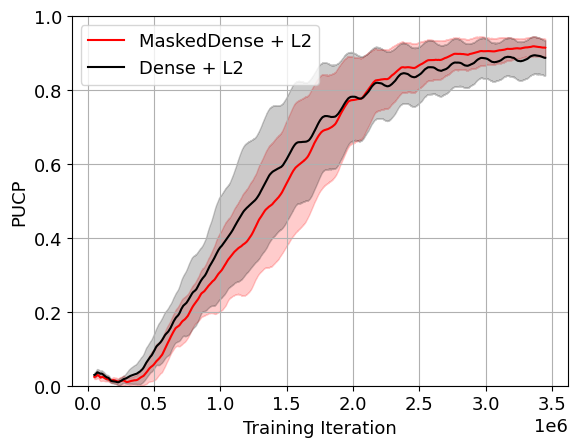

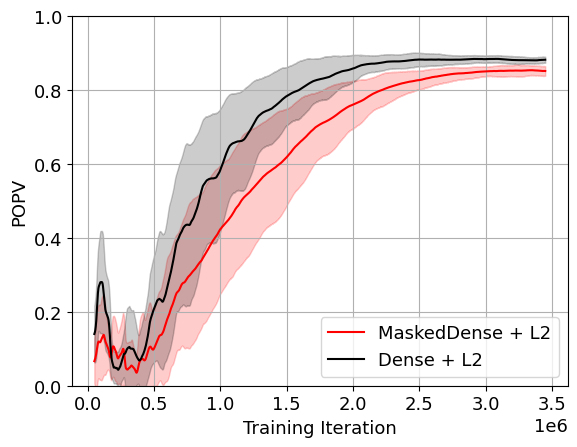

In [53]:
for mask_percent, col, avg_df in all_pairs:
    label = f"{mask_percent}"
    plt.plot(avg_df['Generation_mean'], avg_df['PercentUniqueClassesProduced_mean'], label=label, color=col)
    plt.fill_between(avg_df['Generation_mean'], avg_df['PercentUniqueClassesProduced_mean'] - avg_df['PercentUniqueClassesProduced_std'], avg_df['PercentUniqueClassesProduced_mean'] + avg_df['PercentUniqueClassesProduced_std'], alpha=0.2, color=col)
plt.legend()
plt.xlabel('Training Iteration')
plt.ylabel('PUCP')
plt.ylim(0, 1)
plt.grid()
plt.show()

for mask_percent, col, avg_df in all_pairs:
    label = f"{mask_percent}"
    plt.plot(avg_df['Generation_mean'], avg_df['PercentOfProductionsValid_mean'], label=label, color=col)
    plt.fill_between(avg_df['Generation_mean'], avg_df['PercentOfProductionsValid_mean'] - avg_df['PercentOfProductionsValid_std'], avg_df['PercentOfProductionsValid_mean'] + avg_df['PercentOfProductionsValid_std'], alpha=0.2, color=col)
plt.legend()
plt.xlabel('Training Iteration')
plt.ylabel('POPV')
plt.ylim(0, 1)
plt.grid()
plt.show()